In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")


In [15]:
housing_raw = pd.read_csv(
    "/Users/parvezshahshaik/Documents/Github/analyzing_global_coffee_market/Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

ca_housing = housing_raw.loc[
    (housing_raw["region_name"].str.contains("CA"))
].assign(region_name=housing_raw["region_name"].str[:-11])

ca_housing_pivot = ca_housing.pivot_table(
    index="period_begin",
    columns="region_name",
    values="median_active_list_price"
).loc[:, ["San Francisco", "Los Angeles", "San Diego", "Tulare"]].assign(
    overall_avg=lambda x: x.mean(axis=1)
)
ca_housing_pivot.head()


region_name,San Francisco,Los Angeles,San Diego,Tulare,overall_avg
period_begin,,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8,671136.575
2017-01-09,1233393.7,614061.0,621737.5,227729.1,674230.325
2017-01-16,1239977.0,617311.0,625820.8,229060.4,678042.300
2017-01-23,1247977.0,620644.3,629491.6,229806.2,681979.775
2017-01-30,1253310.4,624541.6,632824.0,230139.5,685203.875


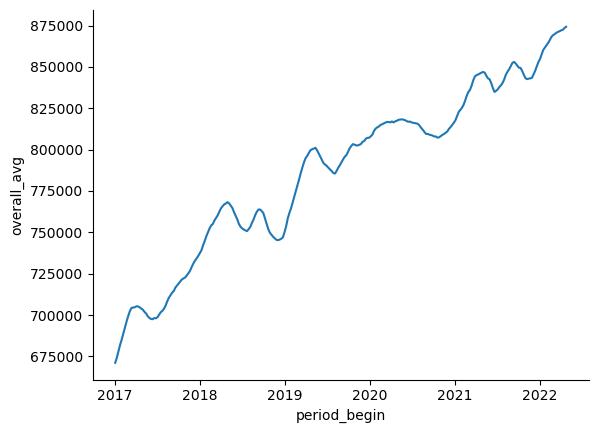

In [16]:
sns.lineplot(
    data=ca_housing_pivot,
    x=ca_housing_pivot.index,
    y="overall_avg"
)

sns.despine()

In [17]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


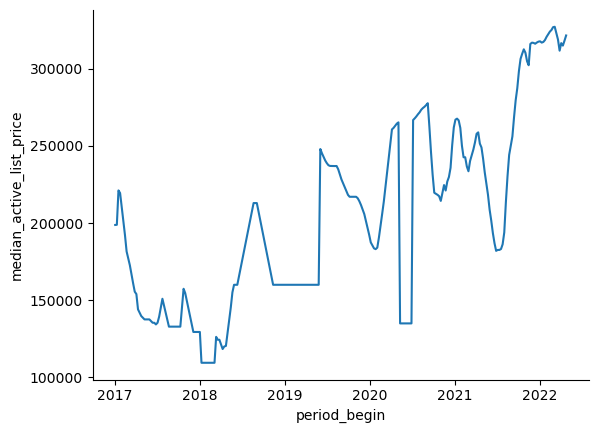

In [19]:
sns.lineplot(
    x="period_begin",
    y="median_active_list_price",
    data=ca_housing,
    #ci=None,
    #estimator=min
)

sns.despine()

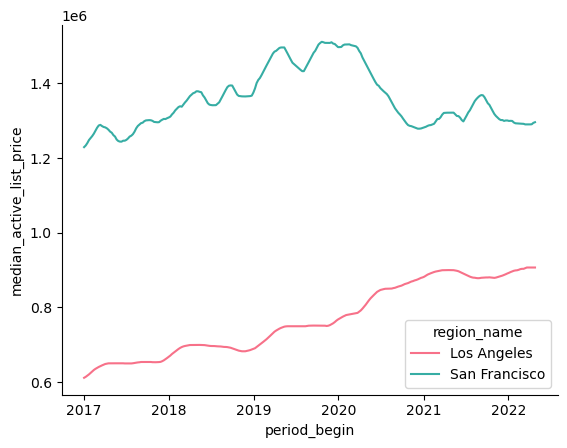

In [24]:
sns.lineplot(
    x="period_begin",
    y="median_active_list_price",
    data=ca_housing.query("region_name in ('Los Angeles', 'San Francisco')"),
    ci=None,
    hue="region_name",
    palette="husl"
)

sns.despine()